In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load the data
housing = pd.read_csv("/content/housing.csv")

In [4]:
df = pd.DataFrame(housing)

In [5]:
# quick view of loaded data
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.shape

(20640, 10)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [9]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [10]:
df.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


In [11]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
#we will fill the bedroom column with median
med = df["total_bedrooms"].median()
med

435.0

In [14]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(med)

In [16]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


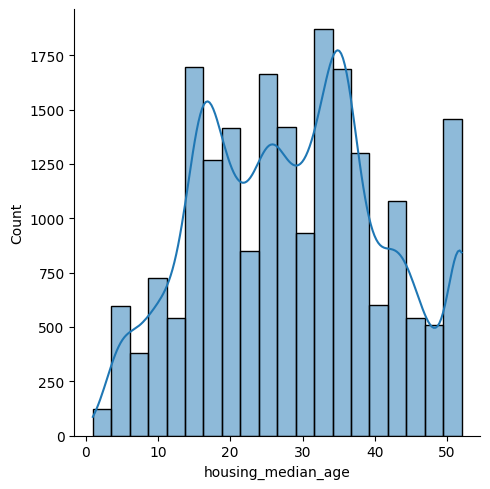

In [17]:
# data visualization
sns.displot(df['housing_median_age'], kde=True, bins=20)

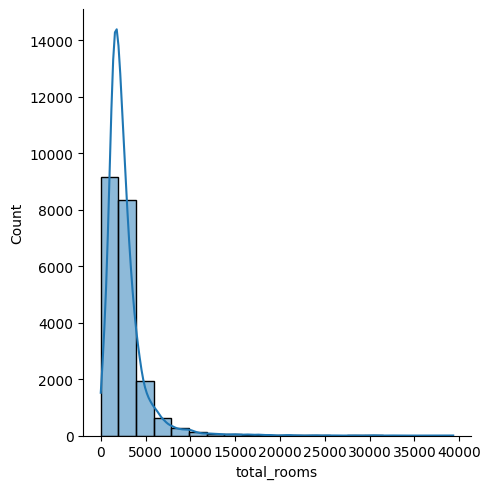

In [18]:
sns.displot(df['total_rooms'], kde=True, bins=20)

In [19]:
#removing the unnecessary columns from the data
df.drop(['longitude', 'latitude'], axis=1, inplace=True)

In [20]:
df = df.rename(columns = {'housing_median_age':'housing_age'})
df.head(3)

,housing_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [21]:
df = df.rename(columns = {'median_house_value': 'housing_value'})
df.head(3)

,housing_age,total_rooms,total_bedrooms,population,households,median_income,housing_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [22]:
df = df.rename(columns = {'median_income': 'income'})
df.head(3)

,housing_age,total_rooms,total_bedrooms,population,households,income,housing_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


<Axes: xlabel='ocean_proximity', ylabel='count'>

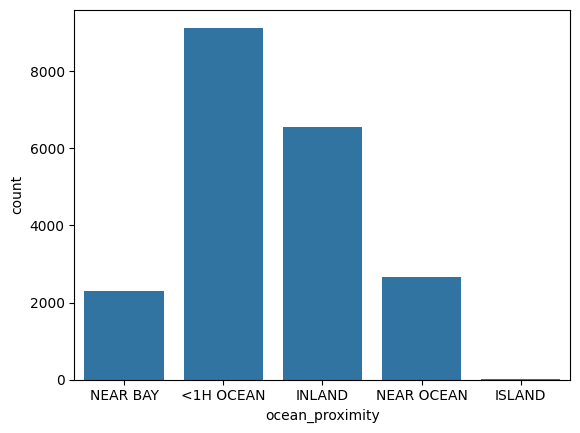

In [23]:
sns.countplot(x=df['ocean_proximity'], data=df)

In [24]:
df = pd.get_dummies(df, drop_first = True, prefix=None)

In [25]:
df.head(3)

,housing_age,total_rooms,total_bedrooms,population,households,income,housing_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False


In [26]:
df.shape

(20640, 11)

In [27]:
df.isnull().sum()

,0
housing_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
income,0
housing_value,0
ocean_proximity_INLAND,0
ocean_proximity_ISLAND,0
ocean_proximity_NEAR BAY,0


In [30]:
#import necessary libraries
from sklearn.preprocessing import StandardScaler

In [31]:
numerical_df = df[['housing_age','total_rooms', 'total_bedrooms', 'population', 'households', 'income','housing_value']]

In [32]:
scaler = StandardScaler()

In [33]:
sc_df = scaler.fit(numerical_df)

In [34]:
scaled_df = sc_df.transform(numerical_df)

In [35]:
new_df_lite = pd.DataFrame(data = scaled_df, columns=numerical_df.columns)

In [36]:
new_df_lite.head(3)

,housing_age,total_rooms,total_bedrooms,population,households,income,housing_value
0,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631
1,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156
2,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693


In [37]:
cat_df = df[['ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']]

In [38]:
new_df = pd.concat([new_df_lite, cat_df], axis=1)
new_df.head()

,housing_age,total_rooms,total_bedrooms,population,households,income,housing_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,False,False,True,False
1,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,False,False,True,False
2,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,False,False,True,False
3,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,False,False,True,False
4,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,False,False,True,False


In [39]:
#import necessary libraries
from sklearn.model_selection import train_test_split

In [40]:
X = new_df.drop('housing_value', axis=1)
y = new_df['housing_value']

In [41]:
X.head(3)

,housing_age,total_rooms,total_bedrooms,population,households,income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,False,False,True,False
1,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,False,False,True,False
2,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,False,False,True,False


In [42]:
y.head(3)

,housing_value
0,2.129631
1,1.314156
2,1.258693


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 , random_state=20)

In [44]:
print(X_train.shape)
print(y_train.shape)

(16512, 10)
(16512,)


In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
lr_pred = lr.predict(X_test)

In [49]:
df1 = pd.DataFrame({"Y_test": y_test , "Y_pred" : lr_pred})
df1.head(3)

,Y_test,Y_pred
6111,-0.773495,-0.447601
17742,0.739597,0.644892
79,-0.654771,-0.356519


In [50]:
lr.score(X_train , y_train)

0.6345174740627686

In [51]:
lr.score(X_test, y_test)

0.6287262669667171

In [52]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

In [53]:
lr_mse = mean_squared_error(y_test , lr_pred)
lr_mae = mean_absolute_error(y_test , lr_pred)
lr_m = mean_absolute_percentage_error(y_test , lr_pred)

In [54]:
print("Mean Square Error: ",lr_mse)

print("Mean Absolute Error: ",lr_mae)

print("Mean Absolute Precentage Error: ",lr_m)

Mean Square Error:  0.3889482944998052
Mean Absolute Error:  0.4444783857121711
Mean Absolute Precentage Error:  2.4094503345762837
